### 0. Read csv files

In [13]:
import numpy as np
import pandas as pd
import os
from IPython.display import display
import warnings
import ipynbname
from pathlib import Path
warnings.filterwarnings('ignore')

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

In [14]:
# direct_llm_id = "direct_llm_20samples_rag_evaluation_results_20251121_104026"
direct_llm_id = "direct_llm_120_samplesrag_evaluation_results_20251121_104114"
directory = Path("../results/aip_saved/")
direct_llm_baseline_path = list(directory.glob(f"{direct_llm_id}*.csv"))
direct_llm_baseline_df = pd.read_csv(direct_llm_baseline_path[0])

# crud_id = "crud_hybrid_aip_test_20_full_20251121_161550"
crud_id = "crud_hybrid_aip_test_full_20251121_161550"
crud_baseline_path = list(directory.glob(f"{crud_id}*.csv"))
crud_baseline_df = pd.read_csv(crud_baseline_path[0])

# 获取所有实验文件夹
results_base_dir = "../results"
experiment_folders = [d for d in os.listdir(results_base_dir) 
                     if os.path.isdir(os.path.join(results_base_dir, d)) and d.startswith('experiment_')]
experiment_id = None
# experiment_id = "experiment_20251121_171952"
experiment_id = "aip_saved/full_CRUD_100/nothink"
if not experiment_id:
    latest_experiment = max(experiment_folders)
    experiment_folder = os.path.join(results_base_dir, latest_experiment)
    print(f"\n选择最新的实验文件夹: {latest_experiment}")
else:
    experiment_folder = os.path.join(results_base_dir, experiment_id)
    print(f"\n选择提供的的实验文件夹: {experiment_id}")


选择提供的的实验文件夹: aip_saved/full_CRUD_100/nothink


In [15]:
direct_llm_baseline_df.describe()

,overall_score,llm_judge_score,rejection_recall,ndcg,ncg,mrr,retrieved_id,execution_time_seconds,ndcg_at_3,ndcg_at_5,retrieved_count,response_sources
count,118.000000,98.000000,0.0,0.0,0.0,0.0,0.0,118.000000,0.0,0.0,98.0,0.0
mean,0.448136,0.521429,NaN,NaN,NaN,NaN,NaN,6.560983,NaN,NaN,0.0,NaN
std,0.400975,0.465567,NaN,NaN,NaN,NaN,NaN,4.264928,NaN,NaN,0.0,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.458000,NaN,NaN,0.0,NaN
25%,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.260500,NaN,NaN,0.0,NaN
50%,0.560000,0.700000,NaN,NaN,NaN,NaN,NaN,6.384000,NaN,NaN,0.0,NaN
75%,0.800000,1.000000,NaN,NaN,NaN,NaN,NaN,10.144750,NaN,NaN,0.0,NaN
max,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,13.304000,NaN,NaN,0.0,NaN


### 1. 处理计算intermediate结果

In [16]:
# from process_intermediate import process_intermediate, calculate_intermediate_metrics
csv_files = [f for f in os.listdir(experiment_folder) 
                 if f.endswith('.csv') and 'rag_evaluation' in f]
csv_df = pd.read_csv(os.path.join(experiment_folder, csv_files[0]))
# process_intermediate(experiment_folder)
# # if 'intermediate_ndcg' not in csv_df:
# csv_df = calculate_intermediate_metrics(experiment_folder)

### 2. 可视化指标

,overall_score,llm_judge_score,rejection_recall,ndcg,ncg,mrr,ndcg_at_3,ndcg_at_5,intermediate_ndcg,intermediate_ncg,intermediate_ndcg_at_3,intermediate_ndcg_at_5,ndcg_inter-final_diff,ncg_inter-final_diff,search_agent_ndcg,search_agent_ncg,ndcg_search_agent-final_diff,ncg_search_agent-final_diff,ndcg_inter-search_agent_diff,ncg_inter-search_agent_diff,execution_time_seconds
count,120.000000,75.000000,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,0.0,0.0,0.0,0.0,0.0,0.0,120.000000
mean,0.654059,0.544933,NaN,0.633104,0.600000,0.765000,0.632498,0.633104,0.543675,0.500681,0.536267,0.541529,-0.102907,-0.102893,NaN,NaN,NaN,NaN,NaN,NaN,18.837580
std,0.307872,0.313913,NaN,0.304262,0.317962,0.300014,0.304184,0.304262,0.295061,0.303561,0.294138,0.294611,0.213478,0.216410,NaN,NaN,NaN,NaN,NaN,NaN,15.481780
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.447700
25%,0.425588,0.285000,NaN,0.416763,0.325000,0.637500,0.416763,0.416763,0.343351,0.292824,0.342156,0.342156,-0.158998,-0.166667,NaN,NaN,NaN,NaN,NaN,NaN,9.294150
50%,0.680329,0.590000,NaN,0.669697,0.600000,0.900000,0.664602,0.669697,0.550922,0.500000,0.539901,0.544794,-0.031827,-0.008333,NaN,NaN,NaN,NaN,NaN,NaN,16.269850
75%,1.000000,0.780000,NaN,0.915329,0.912500,1.000000,0.915329,0.915329,0.724321,0.682292,0.701529,0.709860,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,25.220625
max,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.613147,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,98.379700


主实验数值指标: ['overall_score', 'llm_judge_score', 'ndcg', 'ncg', 'mrr', 'ndcg_at_3', 'ndcg_at_5', 'intermediate_ndcg', 'intermediate_ncg', 'intermediate_ndcg_at_3', 'intermediate_ndcg_at_5', 'ndcg_inter-final_diff', 'ncg_inter-final_diff', 'execution_time_seconds']
CRUD baseline指标: ['overall_score', 'llm_judge_score', 'ndcg', 'ncg', 'mrr', 'ndcg_at_3', 'ndcg_at_5', 'execution_time_seconds']
Direct LLM baseline指标: ['overall_score', 'llm_judge_score', 'execution_time_seconds']


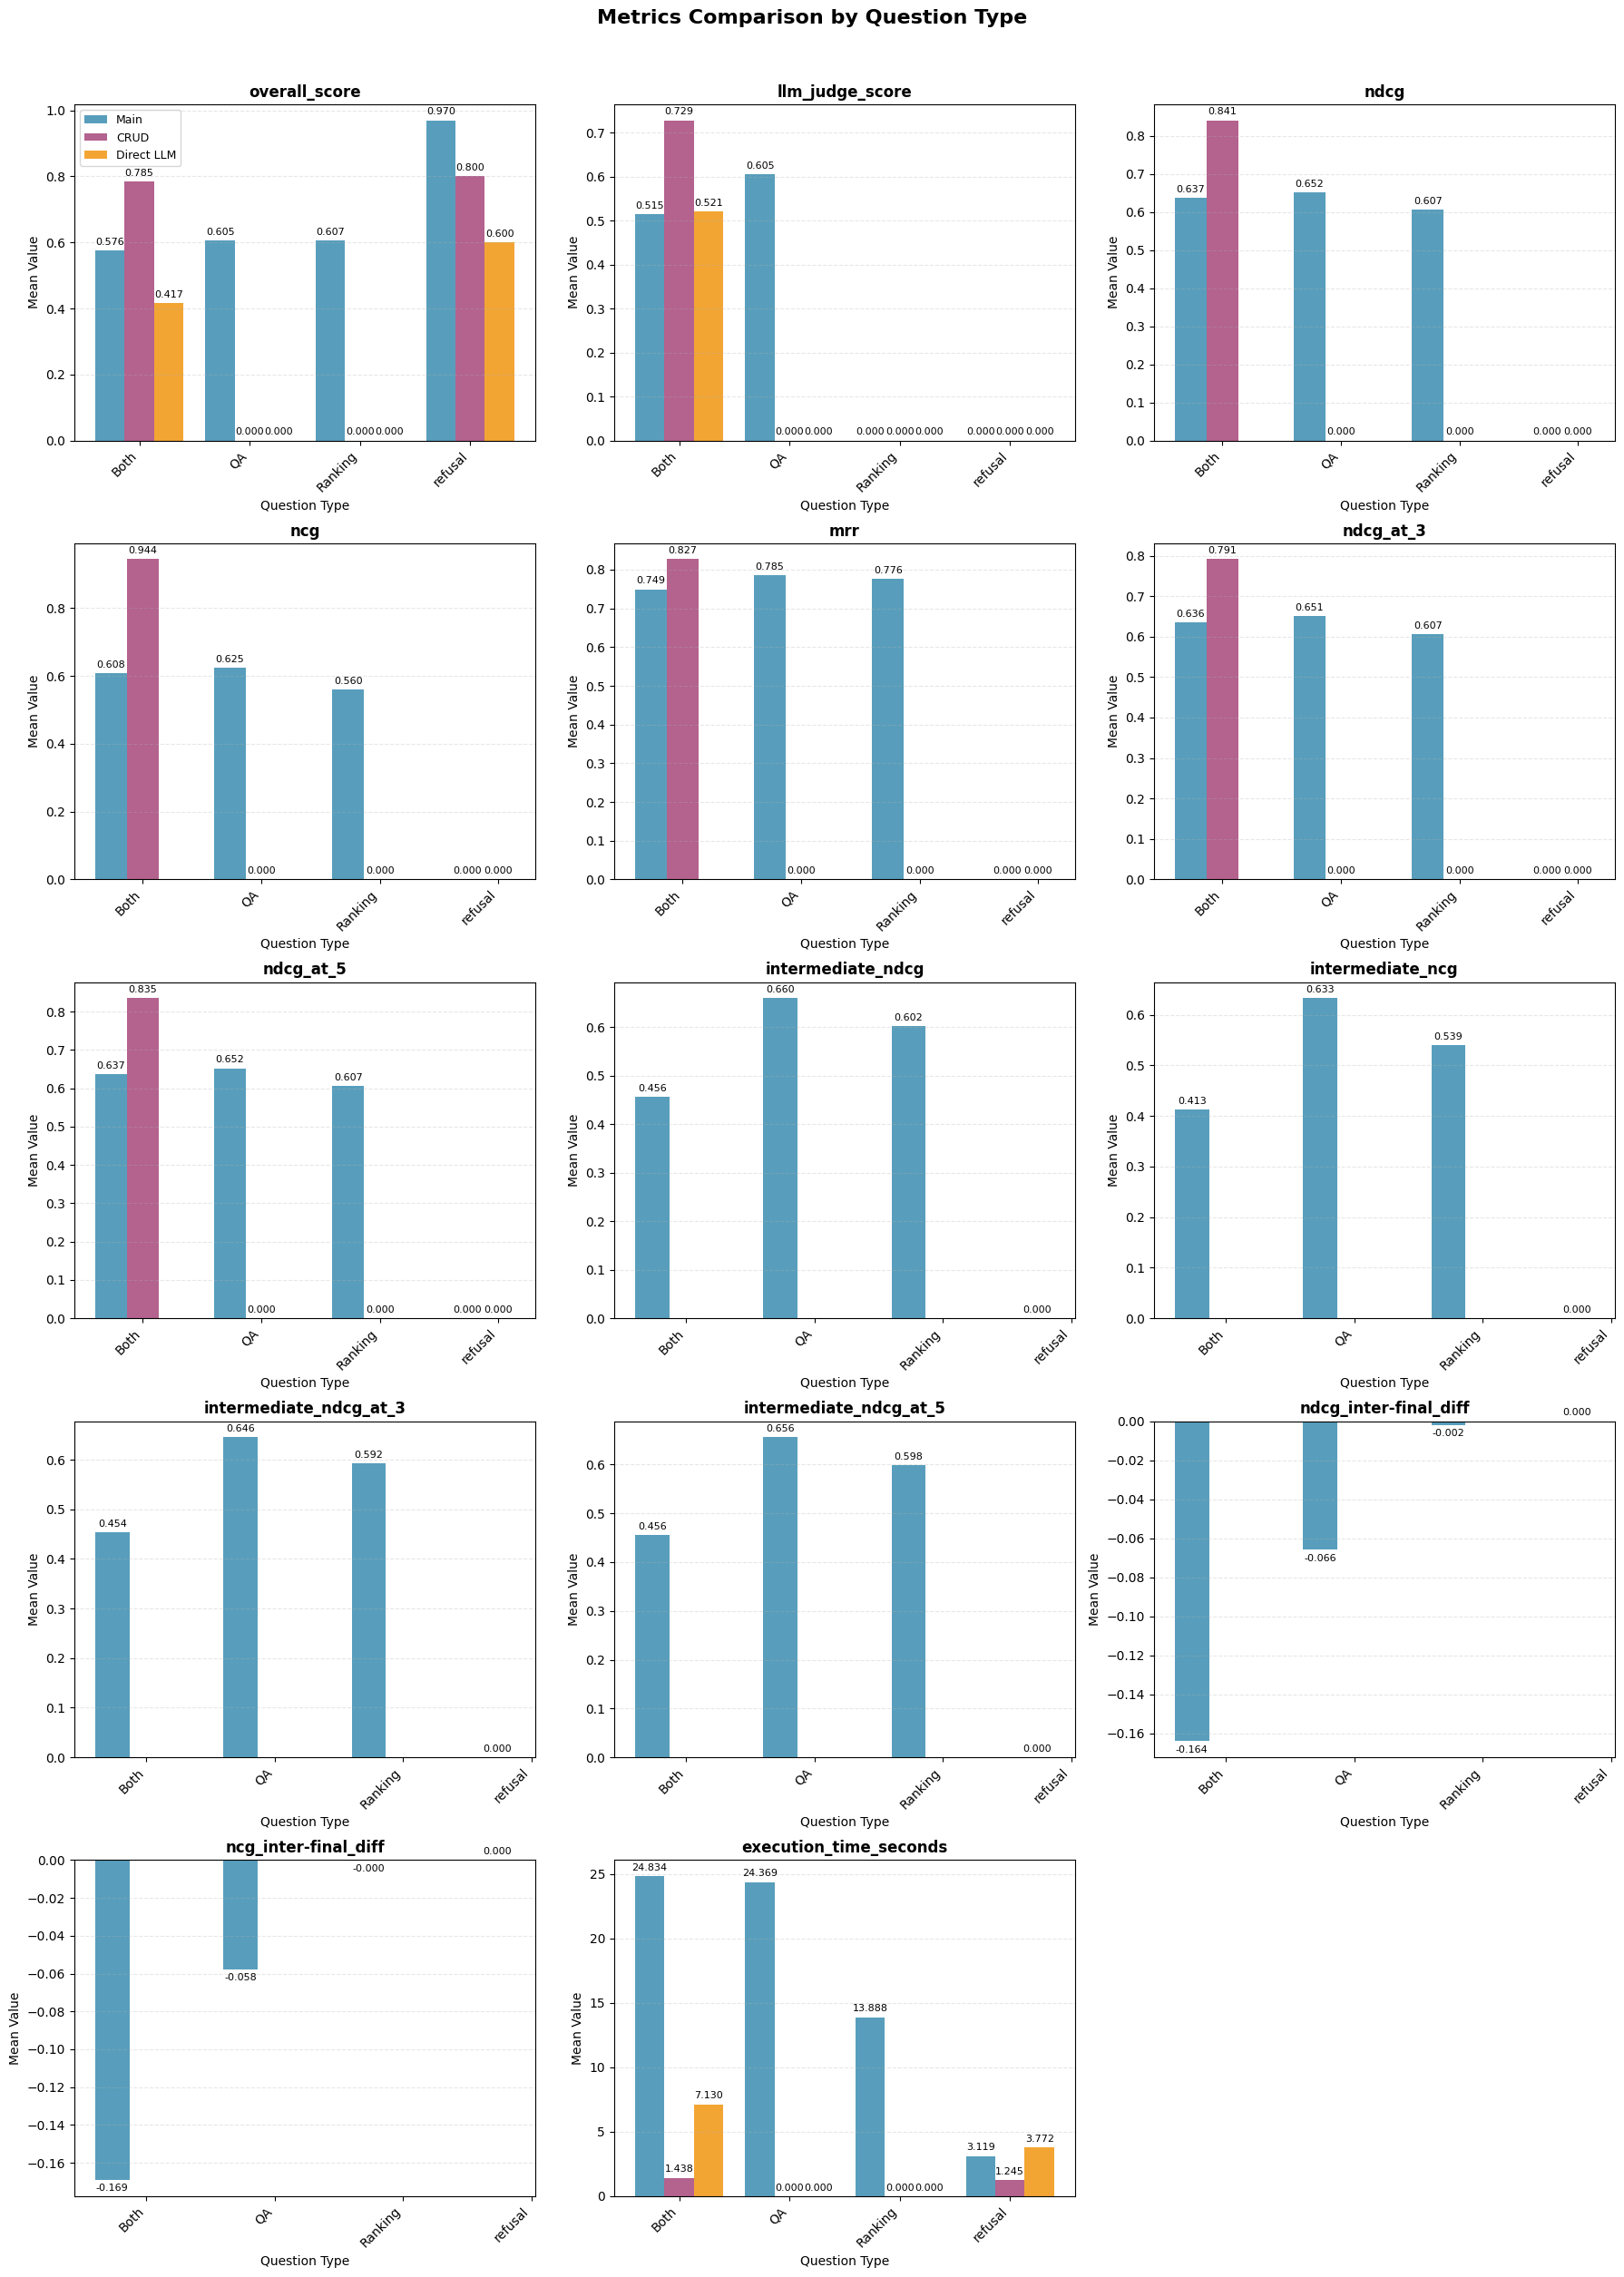

In [17]:
from visualization import visualize_csv
numeric_df = csv_df.select_dtypes(include=[np.number])
display(numeric_df.describe())
fig = visualize_csv(csv_df, crud_df=crud_baseline_df, direct_llm_df=direct_llm_baseline_df)

### 3. save HTML

In [18]:
from save_html import create_html_report_stable
notebook_path = ipynbname.path()
notebook_name = os.path.basename(notebook_path)
name_without_ext = os.path.splitext(notebook_name)[0]

# 确保实验文件夹存在
experiment_folder = os.path.abspath(experiment_folder)
os.makedirs(experiment_folder, exist_ok=True)
create_html_report_stable(experiment_folder, notebook_path)

✅ 已创建无代码 HTML 报告: /home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/aip_saved/full_CRUD_100/nothink/report.html
📊 报告中只包含 markdown 和输出，代码已自动隐藏
